In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import regex as re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')


from gensim.models import Word2Vec


import warnings 
warnings.filterwarnings(action = 'ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
reddit = pd.read_csv('sample_comments.csv', index_col=0)

reddit.head()

,label,comment
139484,0,Nope.
638093,0,Donde esta la biblioteca?
662570,0,I feel bad for the mummy... not even the minio...
652534,1,"The Pirate Bay, of course!"
411846,1,That's exactly how multiple photographers ende...


In [25]:
# custom tokenizer function

def tokenizer(series):
    
    corpus = series.values
    tokens = []
    
    for document in corpus:
        #removing punctuation
        for punc in string.punctuation:
            document = document.replace(punc, '')
        # removing numbers and splitting sentences    
        document = re.sub("\d+", "", document).lower()
        tokens.append(document.split(' '))
        
    
        

    return tokens

In [4]:
X = reddit['comment']
y = reddit['label']

In [5]:
X.values

array(['Nope.', 'Donde esta la biblioteca?',
       'I feel bad for the mummy... not even the minions want to get close to him :(',
       ...,
       'You have to remember that only their black lives matter.......................',
       "Learning few words of the local language when you do to a country wouldn't kill you.",
       'We could have the pre and post parties at the new fake 400 bar!'],
      dtype=object)

In [26]:
tokenizer(X[:2])

[['nope'], ['donde', 'esta', 'la', 'biblioteca']]

In [29]:
tokenized_data = tokenizer(X)

In [30]:
model = Word2Vec(tokenized_data, window=5, min_count=1, workers=4)
model.train(tokenized_data, total_examples=model.corpus_count, epochs=model.epochs)

(10359209, 13178775)

In [17]:
model['related'].shape

(100,)

In [31]:
model.most_similar('sarcastic')

[('facetious', 0.8200381994247437),
 ('aggressor', 0.7399939298629761),
 ('pedantic', 0.7361928224563599),
 ('bitbybit', 0.7308194041252136),
 ('detained', 0.7280286550521851),
 ('achievementist', 0.7197221517562866),
 ('torquen', 0.6856881380081177),
 ('tattletale', 0.6836557388305664),
 ('joking', 0.6791605949401855),
 ('obtuse', 0.6784327030181885)]

In [32]:
model.most_similar('sarcasm')

[('text', 0.6611473560333252),
 ('tag', 0.6478747725486755),
 ('comment', 0.6296629905700684),
 ('username', 0.6222316026687622),
 ('nsfw', 0.6111559867858887),
 ('statement', 0.6013941168785095),
 ('reply', 0.5901398658752441),
 ('satire', 0.5847964286804199),
 ('context', 0.5755115747451782),
 ('post', 0.5723748803138733)]

In [33]:
model.most_similar('satire')

[('inaccurate', 0.747829258441925),
 ('infuriating', 0.742061197757721),
 ('wellresearched', 0.7268141508102417),
 ('factually', 0.7253165245056152),
 ('politico', 0.7236864566802979),
 ('flawed', 0.7221634387969971),
 ('intentional', 0.7181951999664307),
 ('terrifying', 0.716544508934021),
 ('contagious', 0.7157062292098999),
 ('staged', 0.7150063514709473)]

In [34]:
model.most_similar(positive=['joke', 'sarcastic'])

[('joking', 0.6760741472244263),
 ('bitbybit', 0.6599159240722656),
 ('aggressor', 0.6523123979568481),
 ('creepy', 0.6496952772140503),
 ('soundless', 0.6395905017852783),
 ('torquen', 0.6372244358062744),
 ('facetious', 0.6243019104003906),
 ('detained', 0.6224038600921631),
 ('wowi', 0.6156713366508484),
 ('pedantic', 0.614473283290863)]

In [36]:
model.most_similar(positive=['pedantic', 'sarcastic'], negative=['joke'], topn=5)

[('facetious', 0.7672279477119446),
 ('staggered', 0.7110379338264465),
 ('achievementist', 0.7010456323623657),
 ('gaystop', 0.6858866810798645),
 ('reprinted', 0.6763424873352051)]

In [38]:
model.most_similar(positive=['politics', 'sarcasm'])

[('bigotry', 0.6851497888565063),
 ('purely', 0.6750657558441162),
 ('science', 0.6593804955482483),
 ('reality', 0.6412777900695801),
 ('islam', 0.6371521353721619),
 ('statements', 0.6370168924331665),
 ('nature', 0.6303627490997314),
 ('psychology', 0.6246601343154907),
 ('feminism', 0.6218329668045044),
 ('racism', 0.6144044399261475)]

In [40]:
model.most_similar(['onion', 'facetious'])

[('irishamerican', 0.8193817138671875),
 ('duckglass', 0.8165876865386963),
 ('whiiiiiiiite', 0.8109094500541687),
 ('fujin', 0.80914705991745),
 ('ugandan', 0.8077531456947327),
 ('zweten', 0.8063657283782959),
 ('demoman', 0.8038619756698608),
 ('itsnot', 0.7996152639389038),
 ('ezzz', 0.7910621762275696),
 ('descriptor', 0.787704348564148)]

In [41]:
words = ['duh', 'scrub', 'obvious', 'shitlord', 'forgot', 'imo', 'although', 'honestly', 'mostly', 'unfortunate']

In [42]:
sarcasm_test = []

for word in words:
    sarcasm_test.append(model[word])

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

top_words = pca.fit_transform(sarcasm_test)

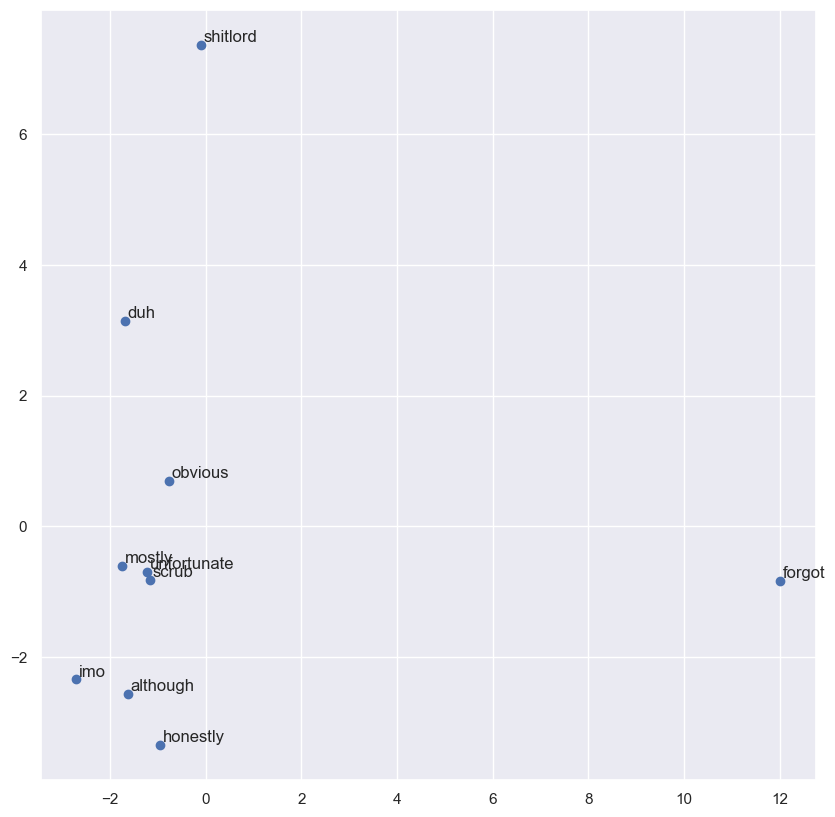

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(top_words[:,0], top_words[:,1])
            
for i, word in enumerate(words):
    plt.annotate(word, xy=(top_words[i,0], top_words[i,1]), xytext=(2,2), textcoords='offset points')

plt.show()